In [284]:
from scipy.stats import norm
import pandas as pd
import numpy as np

# WEEK_Days = 7
# MONTH_Days = 31
# YEAR_Days = 365

WEEK_Days = 5
MONTH_Days = 21
YEAR_Days = 256

Trading_Capital = 10_0000

Exp_Sharpe = 0.5
Annual_Vol = 50 / 100
Exp_Return = Exp_Sharpe * Annual_Vol

Daily_Vol = Annual_Vol / YEAR_Days ** 0.5
Daily_Return = Exp_Return / YEAR_Days
print('daily return process: mean={} std={}'.format(Daily_Return, Daily_Vol))

'''assumption: distribution & gaussian'''
rv = norm(loc=Daily_Return, scale=Daily_Vol)
samples = pd.Series(rv.rvs(10000 * YEAR_Days))
year_returns = []
for year_sample in np.array_split(samples, len(samples) / YEAR_Days):
    year_returns.append(pd.Series(year_sample).cumsum().iloc[-1])
pd.Series(year_returns).describe()

daily return process: mean=0.0009765625 std=0.03125


count    10000.000000
mean         0.246238
std          0.500009
min         -2.001218
25%         -0.087104
50%          0.244829
75%          0.582947
max          1.951619
dtype: float64

In [283]:
Period = MONTH_Days
worst_daliy_loss_each_period = []
for _ in range(5000):
    return_path = pd.Series(rv.rvs(size=Period))
    capital_path = pd.concat([pd.Series([Trading_Capital]), Trading_Capital + Trading_Capital * return_path.cumsum()])
    worst_daliy_loss_each_period.append(capital_path.diff().min())
print(pd.Series(worst_daliy_loss_each_period).mean())

-5811.715409711018


In [282]:
Period = YEAR_Days
worst_weekly_loss_each_period = []
for _ in range(5000):
    return_path = pd.Series(rv.rvs(size=Period))
    capital_path = pd.concat([pd.Series([Trading_Capital]), Trading_Capital +  Trading_Capital * return_path.cumsum()])
    worst_weekly_loss_each_period.append(capital_path[::WEEK_Days].diff().min())
print(pd.Series(worst_weekly_loss_each_period).mean())

-15210.43746428586


In [281]:
Period = 10 * YEAR_Days
worst_monthy_loss_each_period = []
for _ in range(5000):
    return_path = pd.Series(rv.rvs(size=Period))
    capital_path = pd.concat([pd.Series([Trading_Capital]), Trading_Capital + Trading_Capital * return_path.cumsum()])
    worst_monthy_loss_each_period.append(capital_path[::MONTH_Days].diff().min())
print(pd.Series(worst_monthy_loss_each_period).mean())

-34832.72261070409


In [244]:
Period = 1 * YEAR_Days

end_of_period_capital = []
for _ in range(5000):
    return_path = pd.Series(rv.rvs(size=Period))
    capital_path = pd.concat([pd.Series([Trading_Capital]), Trading_Capital * (return_path + 1).cumprod()])
    end_of_period_capital.append(capital_path.iloc[-1])

(pd.Series(end_of_period_capital) < Trading_Capital * 1).sum() / 5000

0.601

/Users/weiranzhou/Code/pysystemtrade/sysobjects/futures_per_contract_prices.py:33: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._as_df = price_data_as_df


<AxesSubplot:xlabel='index'>

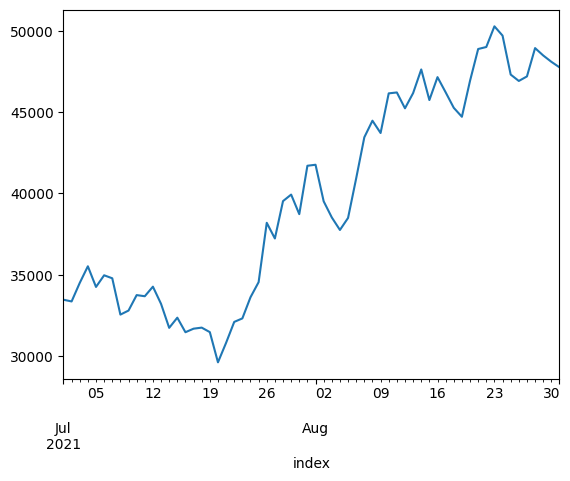

In [324]:
import pandas as pd
from paper.sysdata.sim.db_perpetuals_sim_data import dbPerpetualsSimData

price = dbPerpetualsSimData().daily_prices('BTC-USDT-SWAP')
price[(price.index.year == 2021) & (price.index.month <= 8) & ((price.index.month >= 7))].plot()

/opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


,mac2,mac4,mac8
mac2,1.000000,0.927279,0.616911
mac4,0.927279,1.000000,0.790885
mac8,0.616911,0.790885,1.000000


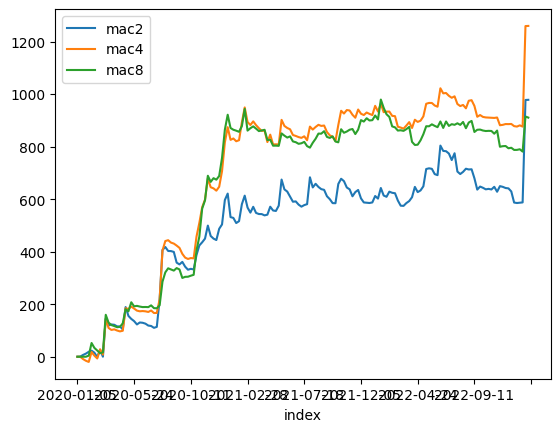

In [333]:
import pandas as pd
from itables import show

vol = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/tmp.csv', index_col=0)
vol[['mac2','mac4','mac8']].cumsum().plot()
vol[['mac2','mac4','mac8']].corr()

/opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date,rule'>

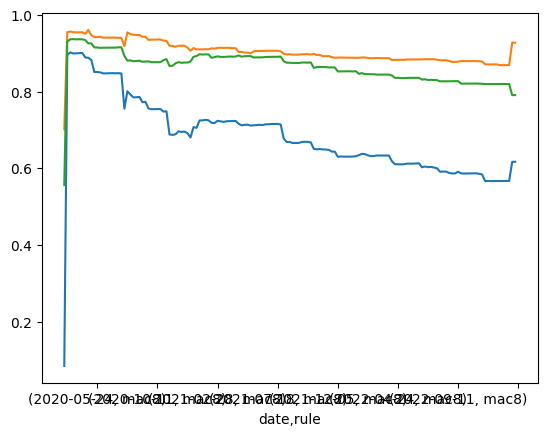

In [353]:
import pandas as pd
from itables import show

df = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/raw_corr.csv', index_col=[0,1])
df.index.names = ['date', 'rule']
df.query('rule == "mac2"')['mac8'].plot()
df.query('rule == "mac2"')['mac4'].plot()
df.query('rule == "mac8"')['mac4'].plot()
